# ---------------------- We are working on this 'Car price Prediction' Project the main aim of this project to predict selling price of the car. --------------------------------------
# ---------------------- Also in this we are using Python libraries in order to do data analysis and model building. -----------------------------------------------------------------------

## * Importing all the relevant Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

## * Reading Dataset using 'Pandas' Library and storing dataset in 'df' variable.

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## * Here we are checking how many rows and columns available in dataset.

In [3]:
# In this we have 301 rows and 9 columns available.

df.shape

(301, 9)

## * Now checking unique value available in category column ('Fuel Type', 'Seller Type' and 'Transmission')

In [4]:
print('We have Car in those Fuel Variant',df['Fuel_Type'].unique())
print('We have such Seller Type',df['Seller_Type'].unique())
print('We have Car Transmission type',df['Transmission'].unique())
print('We have such owner of car',df['Owner'].unique())

We have Car in those Fuel Variant ['Petrol' 'Diesel' 'CNG']
We have such Seller Type ['Dealer' 'Individual']
We have Car Transmission type ['Manual' 'Automatic']
We have such owner of car [0 1 3]


## * Here we are going to check if there's Null value available in dataset.

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## * We can also use describe function just to get clearity about data available in column like Mean, Median, 50%, 75% of the data available.

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## * As above it was just showing numeric column details only and as we needs to see catrgorical data details as well like unique etc. We are using include = 'all' for that. Also we have use T below it's for transpose the data by changing rows in columns and columns in rows just for proper view.

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Car_Name,301,98,city,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,301.0,NaN,NaN,NaN,2013.627907,2.891554,2003.0,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,NaN,NaN,NaN,4.661296,5.082812,0.1,0.9,3.6,6.0,35.0
Present_Price,301.0,NaN,NaN,NaN,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,NaN,NaN,NaN,36947.20598,38886.883882,500.0,15000.0,32000.0,48767.0,500000.0
Fuel_Type,301,3,Petrol,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seller_Type,301,2,Dealer,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,301,2,Manual,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,301.0,NaN,NaN,NaN,0.043189,0.247915,0.0,0.0,0.0,0.0,3.0


## * Now we want to know how old the car is and as we have 'Year' Column in the dataset by that we can get to know we have different car how old it is but for that we need to get current year and subtract by year. In order to get current year we are using 'datetime' function in python and importing it in today variable and getting year store in this_year variable.

In [8]:
today = datetime.date.today()
this_year = today.year
print(this_year)

2024


In [9]:
df['Years_old'] = this_year -  df['Year'] 

In [10]:
df['Years_old']

0      10
1      11
2       7
3      13
4      10
       ..
296     8
297     9
298    15
299     7
300     8
Name: Years_old, Length: 301, dtype: int64

## * Here we need to remove unusual columns  in dataset so we are removing 'Car_Name' from there and setting up new dataset with the name of 'new_dataset'.

In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Years_old'],
      dtype='object')

In [12]:
new_dataset = df[['Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Years_old']]

In [13]:
new_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


## * So here this is the time now to convert Categorical Columns in Numeric form because we can perform calculation on it and for that we are going to use here get_dummies function available in pandas.

In [14]:
new_dataset = pd.get_dummies(new_dataset, drop_first= True)

In [15]:
new_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


## * Now we are going to check the correlation between columns just to do dimensionality reduction or selection of important columns.

In [16]:
new_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Years_old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


## * As it is in the numeric form it's difficult to understand correlation with each other. So we are going to visualize this in diagramatical form using charts like pairplot and heatmap below.

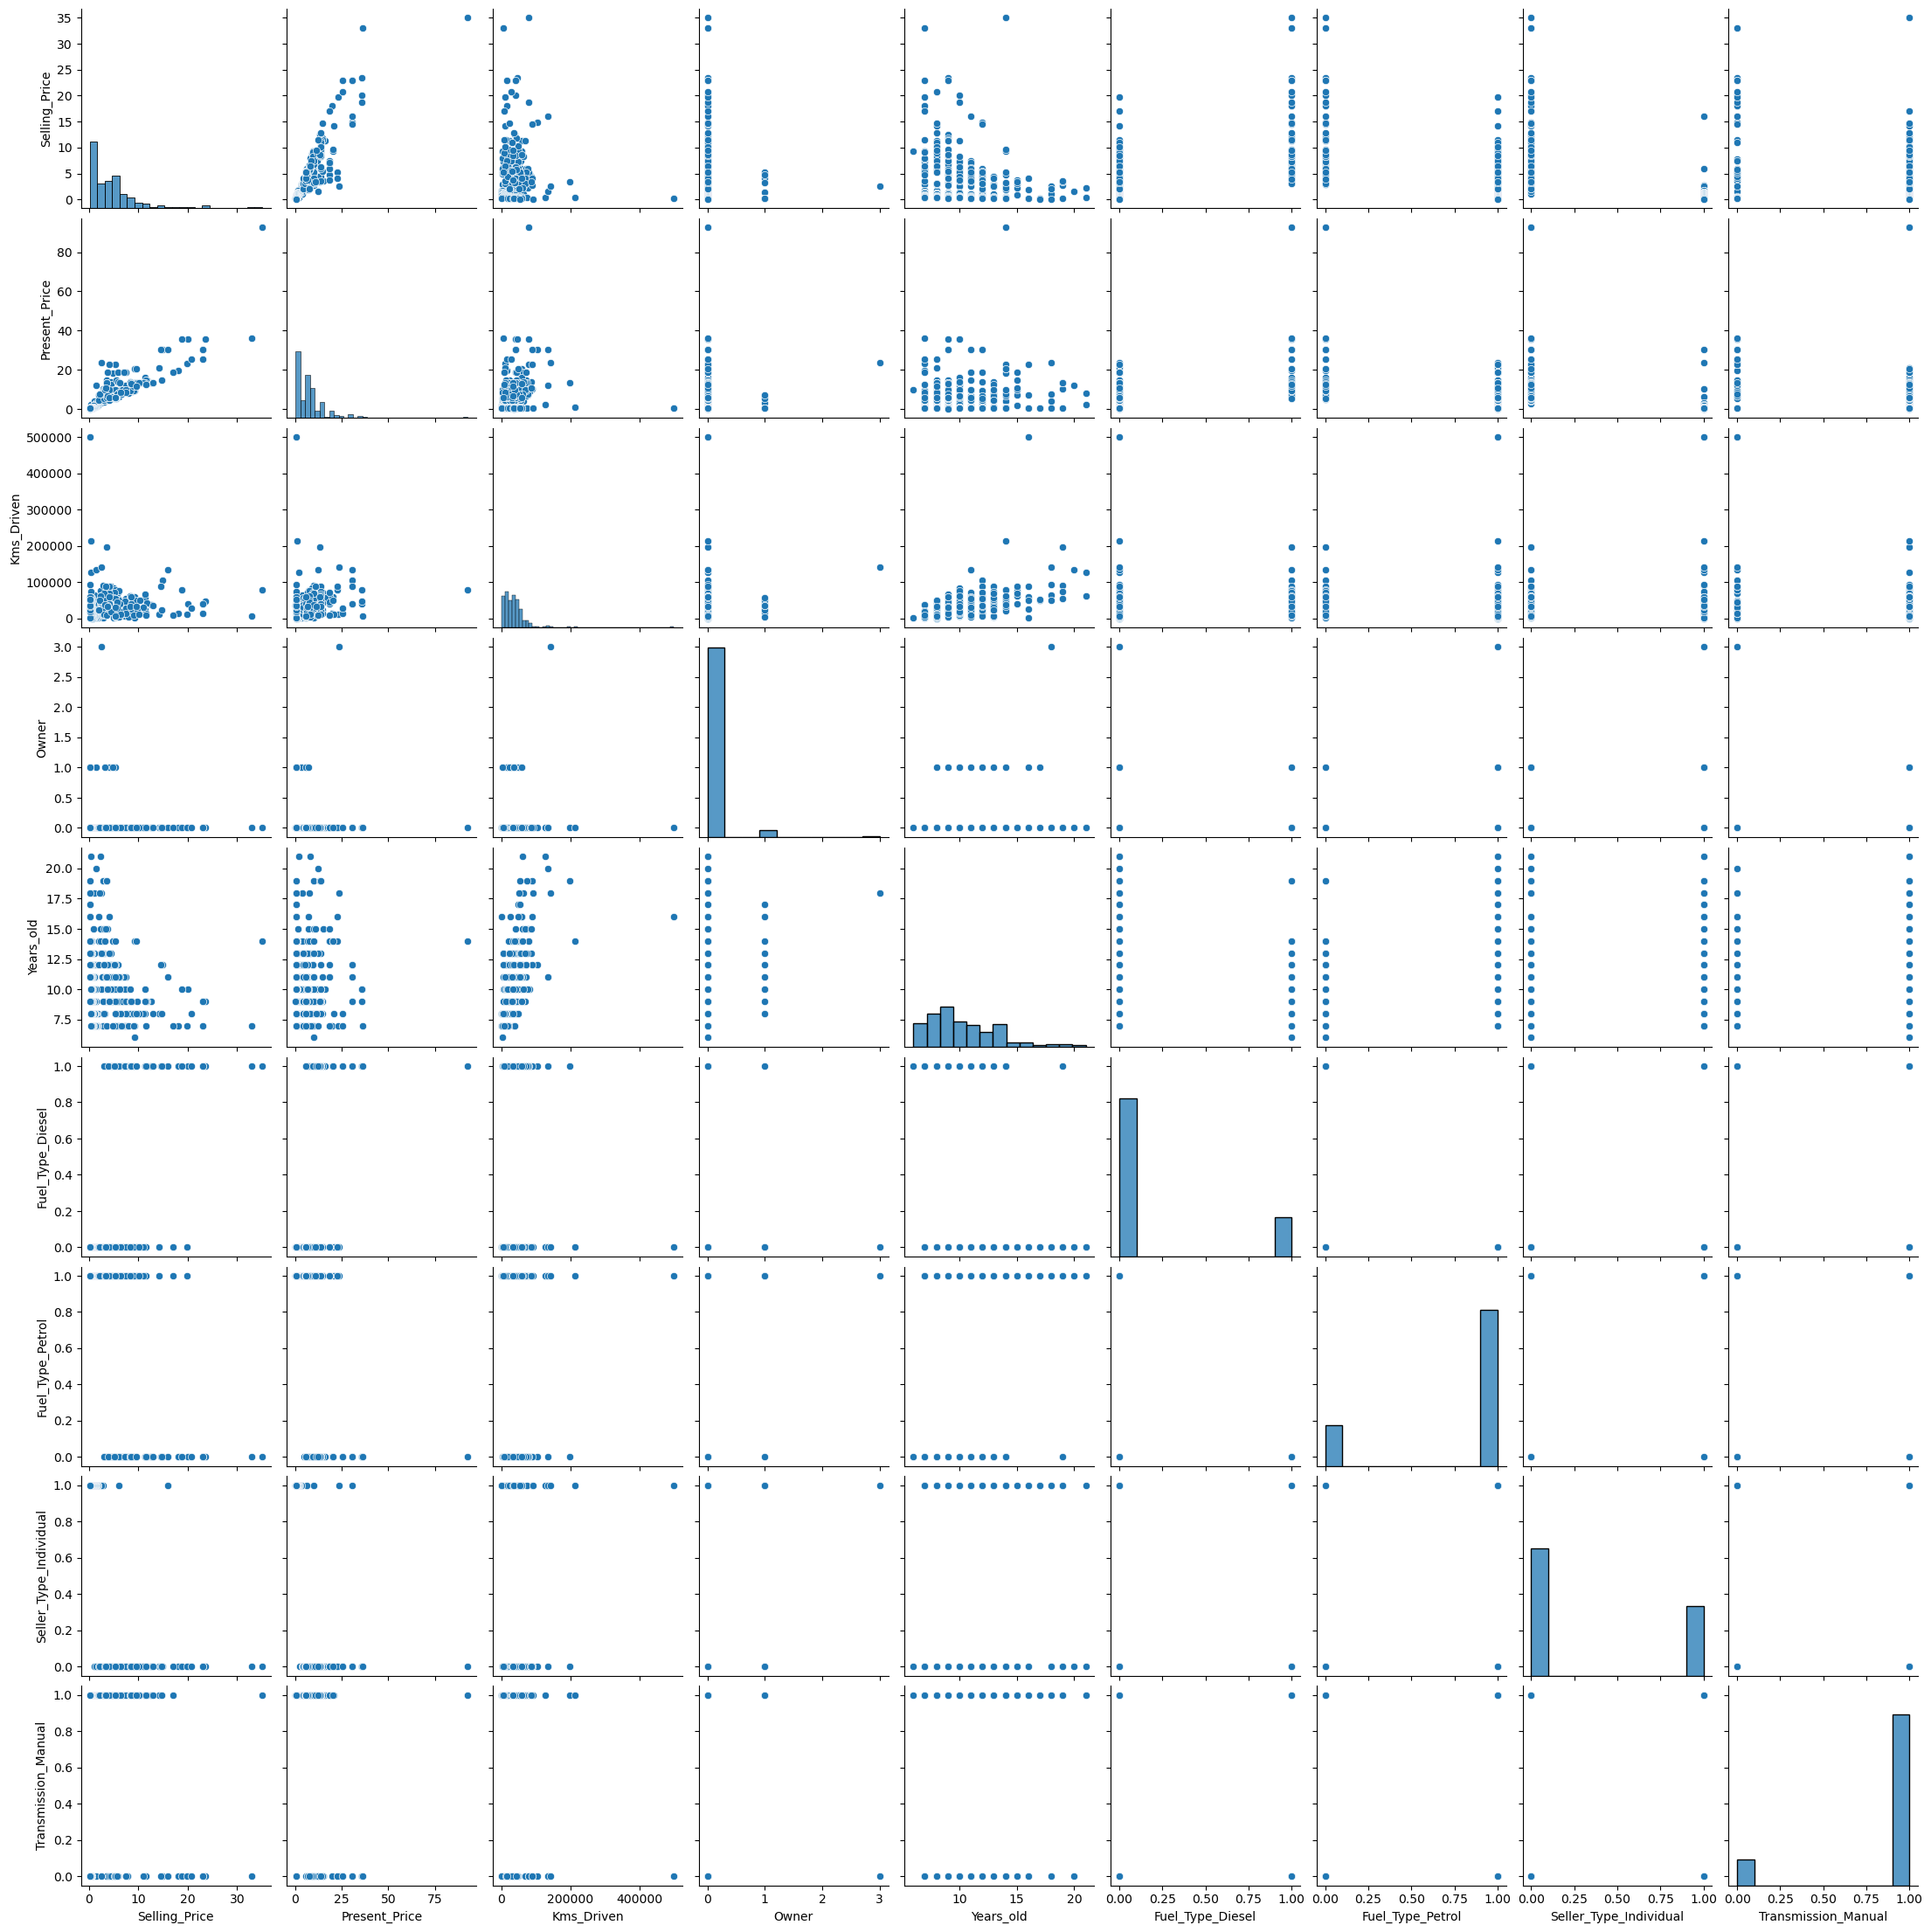

In [17]:
sns.pairplot(new_dataset)

## * Here below you can see 'Heatmap' diagram where it is clearly visible which column is positively correlated with each other by this we can get to know which column is important for model building.

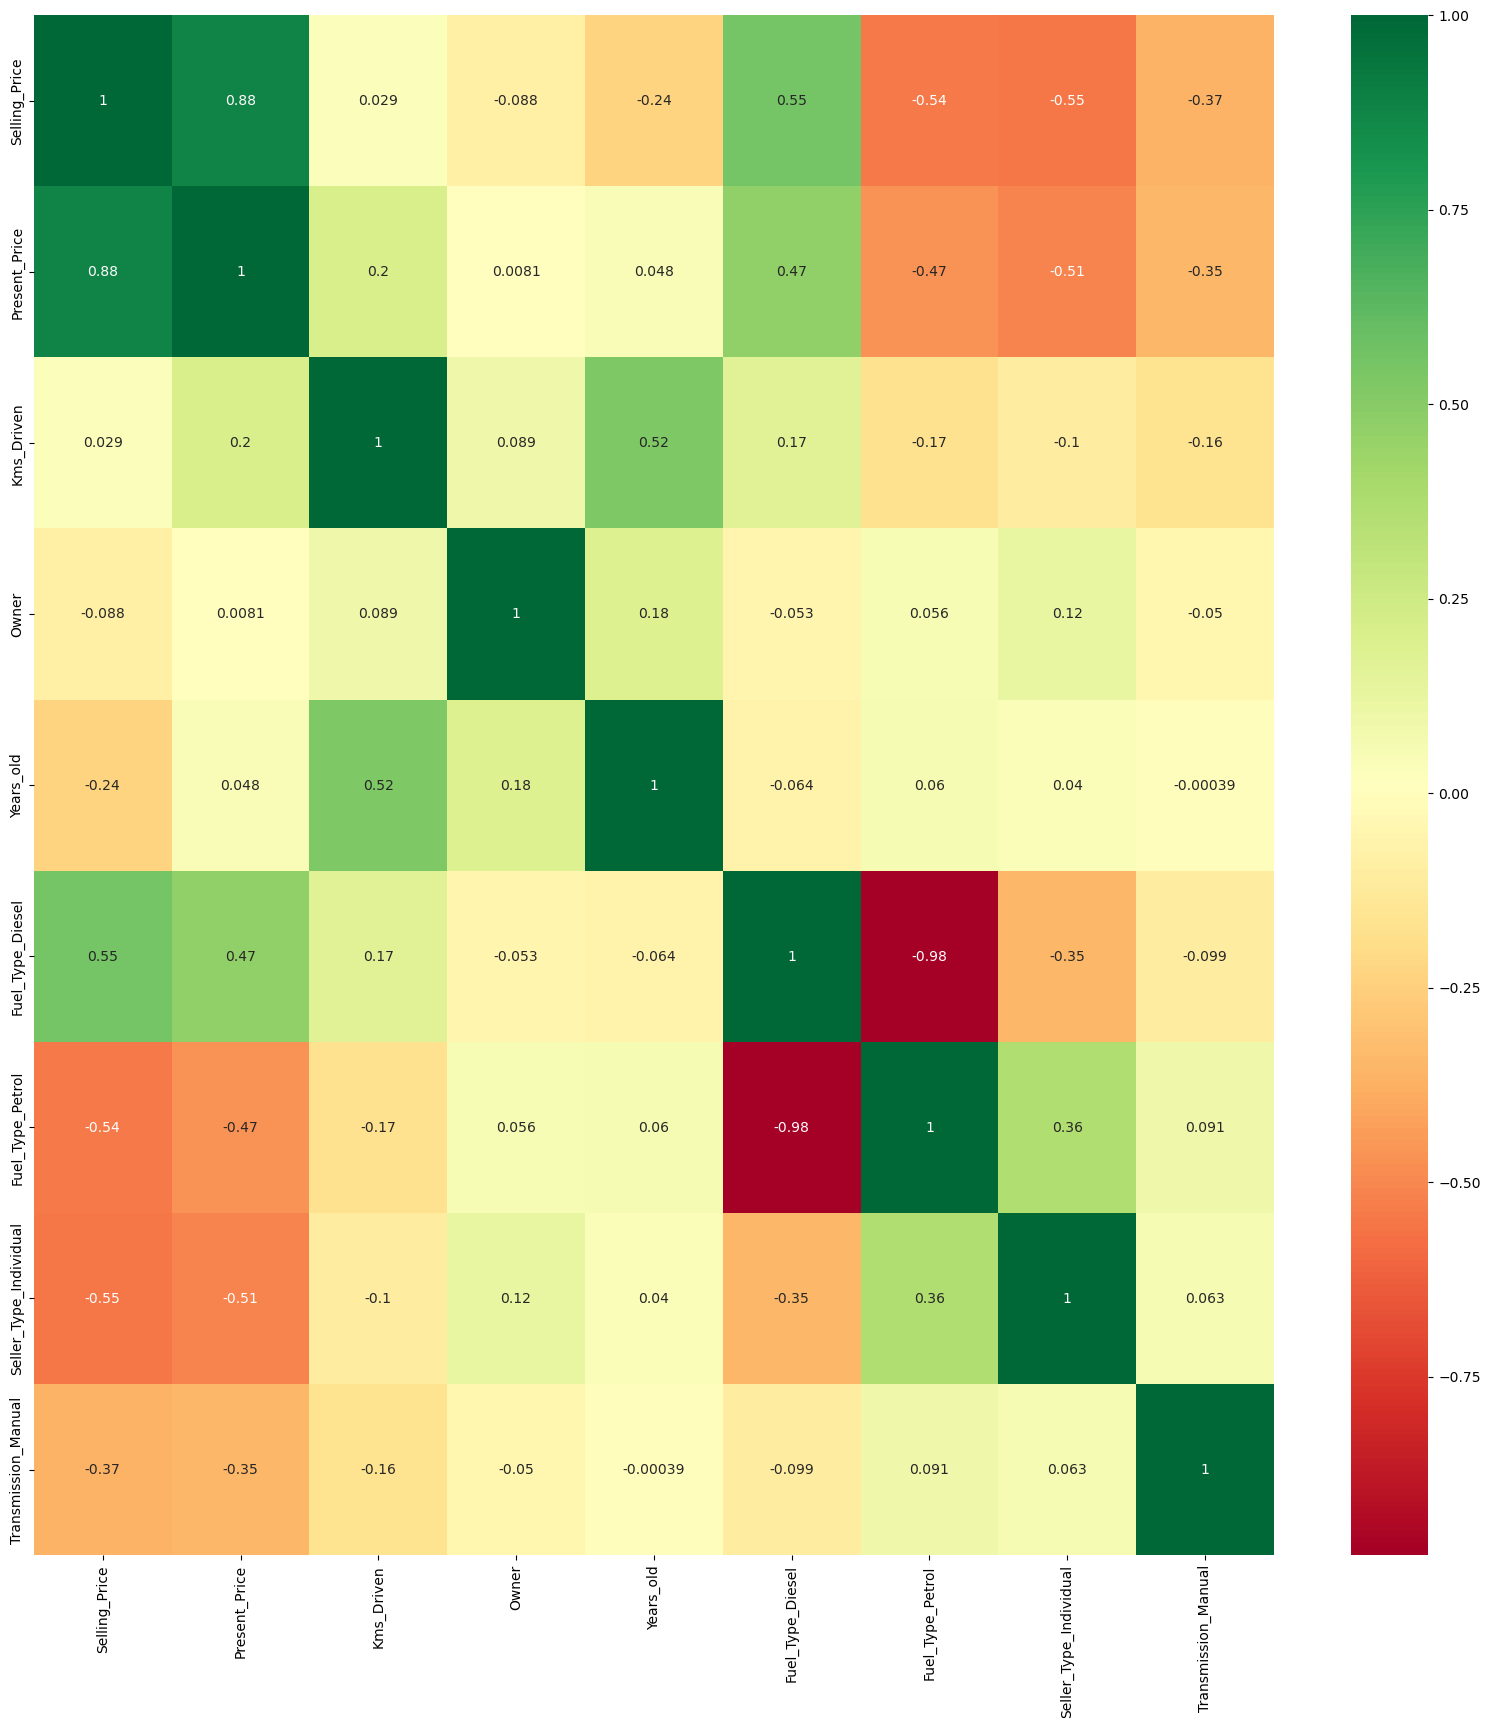

In [18]:
corrmat = new_dataset.corr()
top_feat = corrmat.index
plt.figure(figsize=(20,20))
h = sns.heatmap(new_dataset[top_feat].corr(), annot=True, cmap="RdYlGn")

## * Now we are separating data independent and dependent form with the help of (x and y). so we can train the model and test it with the help of multiple machine learning algorithms. Here x will be independent variable and y will be dependent variable.

In [19]:
new_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


In [20]:
x = new_dataset.iloc[:,1:]
y = new_dataset.iloc[:,0]

In [21]:
x.head()

,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,10,0,1,0,1
1,9.54,43000,0,11,1,0,0,1
2,9.85,6900,0,7,0,1,0,1
3,4.15,5200,0,13,0,1,0,1
4,6.87,42450,0,10,1,0,0,1


In [22]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

## * Here we are going to do feature selection process means check which are the important columns in our dataset using 'Extratreesregressor' because if we have multiple columns available we can only take important one out from there.

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

## * Now we are printing the important feature in number and in diagram we are showing Top 5 important feature out from dataset there.

In [24]:
print(model.feature_importances_)

[0.42216867 0.04019641 0.00128536 0.07524123 0.21165485 0.00914742
 0.11222682 0.12807925]


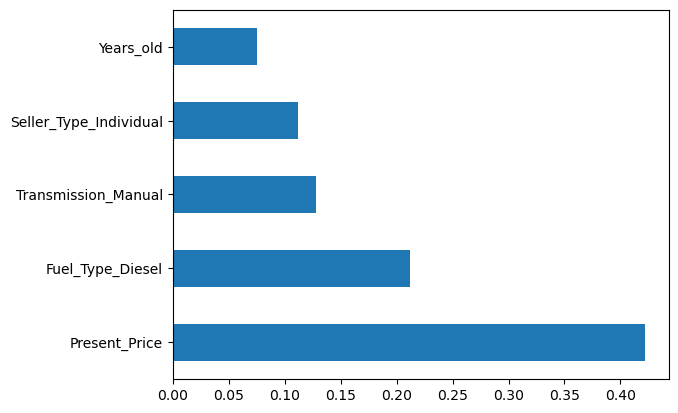

In [25]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## * Here we are going to split the data in train and test form just for training the model so we can test it. So for that we are going to take 'sklearn.model' library and import 'train_test_split' for that.

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

## * Below you can find training and testing dataset 'x_train', 'y_train' and 'y_train', 'y_test'.

In [27]:
x_train

,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
107,1.50,15000,0,11,0,1,1,1
82,25.39,15000,0,7,1,0,0,0
25,4.99,20000,0,13,0,1,0,1
162,0.99,14500,0,12,0,1,1,1
287,7.50,44000,0,9,0,1,0,0
...,...,...,...,...,...,...,...,...
117,1.90,14000,0,9,0,1,1,1
229,6.79,52132,0,12,1,0,0,1
99,20.45,50024,0,14,1,0,0,1
261,5.97,5600,0,8,0,1,0,1


In [28]:
x_test

,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
242,7.13,34000,0,10,0,1,0,1
160,0.95,24000,0,13,0,1,1,1
3,4.15,5200,0,13,0,1,0,1
204,4.43,28282,0,9,0,1,0,1
228,9.40,60000,0,12,1,0,0,1
...,...,...,...,...,...,...,...,...
185,0.58,1900,0,16,0,1,1,0
67,20.45,59000,0,14,1,0,0,1
282,14.00,63000,0,10,1,0,0,1
83,13.46,38000,0,9,1,0,0,1


In [29]:
y_train

107     1.25
82     23.00
25      3.00
162     0.45
287     5.75
       ...  
117     1.10
229     3.10
99      9.65
261     5.50
5       9.25
Name: Selling_Price, Length: 240, dtype: float64

In [30]:
y_train.shape

(240,)

In [31]:
y_test.shape

(61,)

## ---------- Now we are going to use 'RandomForestRegressor' in order to train and test the model. Also we are going to decide the parameter which we are using for 'RandomForestRegressor' for that we are using 'Hyperparameter Tuning' - 'RandomizedSearchCV' for that. ------------

In [32]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [33]:
## Hyperparameters

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]


In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [36]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [37]:
rf = RandomForestRegressor()

In [38]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [39]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.7s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.7s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.1s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.9s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.9s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.9s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.8s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.6s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.8s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.6s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.7s
[CV] END max_depth=5, max_feat

C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.9s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.7s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.6s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.6s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.7s


C:\Users\mv650\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [40]:
prediction = rf_random.predict(x_test)

In [41]:
prediction

array([ 4.50831744,  0.46249283,  2.56261814,  3.10838955,  4.79520604,
       14.30563895,  0.44655997,  1.19723904, 10.88533194,  1.19723904,
        7.66895348,  3.16751188,  0.66147263,  1.19915424,  3.21486177,
        0.98335723,  6.41887036,  2.78491648,  4.52306101,  0.69531371,
        1.1715929 ,  9.89703953, 20.11657924,  3.27662483,  7.37139647,
       20.00419661,  1.15703548,  7.35736856,  5.91113672,  0.48866796,
        0.49919492,  8.53079495,  0.62207085,  1.16724315,  6.63852553,
        0.52916393,  3.10704941,  0.30372028,  3.89709863,  7.71669075,
        1.08467607,  5.04044733, 18.79050502,  3.00292126,  6.82551496,
        5.01555677,  0.34211514,  4.28630727,  0.30375844,  0.59177888,
        5.47670866,  3.63752731, 14.06389403,  5.50671052,  0.30962006,
        7.49970784,  0.3844944 , 13.51428826,  8.49295179,  9.77125613,
        5.64693673])

C:\Users\mv650\AppData\Local\Temp\ipykernel_1588\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='Selling_Price', ylabel='Density'>

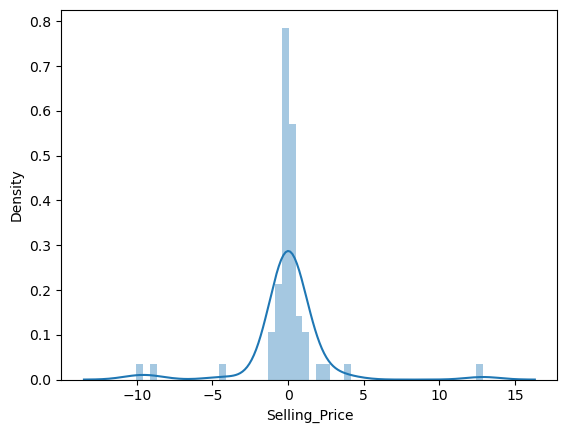

In [42]:
sns.distplot(y_test-prediction)

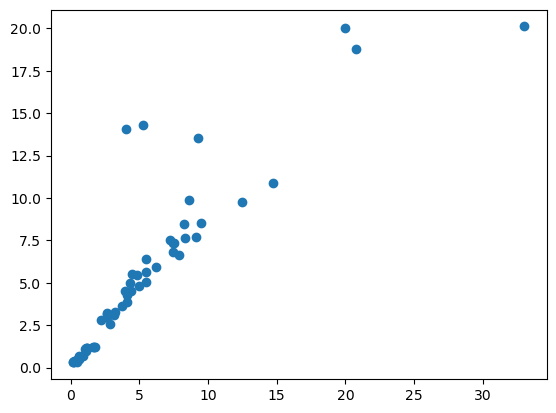

In [43]:
plt.scatter(y_test,prediction)

## ------ This time we are using 'LinearRegression' Algorithm to train the Model and then we are checking how it is performing on the test data. But before using 'LinearRegression' We are going to normalize the dataset available in differnet column using 'StandardScaler' library you can see below. -----------

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## * After importing library we are going to fit and transform in 'train' data and then transform in 'test' data.

In [45]:
x_train = scaler.fit_transform(x_train)

In [46]:
x_test = scaler.transform(x_test)

In [47]:
x_train

array([[-0.69012536, -0.54789127, -0.17482355, ...,  0.49348082,
         1.36277029,  0.3992747 ],
       [ 2.02742313, -0.54789127, -0.17482355, ..., -2.02642122,
        -0.73379939, -2.50454133],
       [-0.29312895, -0.42842599, -0.17482355, ...,  0.49348082,
        -0.73379939,  0.3992747 ],
       ...,
       [ 1.46548552,  0.28893913, -0.17482355, ..., -2.02642122,
        -0.73379939,  0.3992747 ],
       [-0.18165145, -0.772486  , -0.17482355, ...,  0.49348082,
        -0.73379939,  0.3992747 ],
       [ 0.2574334 , -0.85680459, -0.17482355, ..., -2.02642122,
        -0.73379939,  0.3992747 ]])

In [48]:
x_test

array([[-4.96984905e-02, -9.39232054e-02, -1.74823550e-01,
        -1.51073924e-01, -4.86942915e-01,  4.93480816e-01,
        -7.33799386e-01,  3.99274705e-01],
       [-7.52689269e-01, -3.32853767e-01, -1.74823550e-01,
         8.56085569e-01, -4.86942915e-01,  4.93480816e-01,
         1.36277029e+00,  3.99274705e-01],
       [-3.88681099e-01, -7.82043222e-01, -1.74823550e-01,
         8.56085569e-01, -4.86942915e-01,  4.93480816e-01,
        -7.33799386e-01,  3.99274705e-01],
       [-3.56830384e-01, -2.30543700e-01, -1.74823550e-01,
        -4.86793755e-01, -4.86942915e-01,  4.93480816e-01,
        -7.33799386e-01,  3.99274705e-01],
       [ 2.08519805e-01,  5.27296254e-01, -1.74823550e-01,
         5.20365738e-01,  2.05362881e+00, -2.02642122e+00,
        -7.33799386e-01,  3.99274705e-01],
       [ 1.73621659e+00,  1.00515738e+00, -1.74823550e-01,
         1.19180540e+00, -4.86942915e-01,  4.93480816e-01,
        -7.33799386e-01, -2.50454133e+00],
       [-7.48139167e-01,  1.689004

## * So here we are importing 'LinearRegression' library from 'sklearn.linear_model' in order to work on this.

In [49]:
from sklearn.linear_model import LinearRegression

## * Now we are going to Hyperparameter tune the Model by using parameters like cross validation library 'cross_val_score' in 'Linear Regression' from 'sklearn.model_selection'.

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [52]:
mse = cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error', cv=5)


In [53]:
mse

array([-3.15335343, -3.00243848, -3.61909406, -2.07439981, -5.98758114])

In [54]:
np.mean(mse)

-3.5673733839085124

## * As you can see above we have use 'cross validation = 5' means it has split the data 5 times in train and test part then get each time accuracy in array. Afterthat wih the combination of 5 times cross validation it came with the mean of that less error which is '-3.80045.......'.

## * Below we are going to check the prediction on the dataset and see difference between actual and predicted model.

In [55]:
prediction = regression.predict(x_test)

In [56]:
prediction

array([ 4.59564933, -0.36562888,  2.31506106,  3.83275733,  6.14477636,
       11.03708366,  0.31562011,  2.31408827, 10.11184309,  2.28740724,
        7.77711259,  3.44880538,  1.84385178,  1.97167141,  2.84301385,
        0.56508797,  7.31382106,  2.61625259,  4.8178937 ,  1.9423909 ,
        2.12905448,  7.76723707, 21.05097673,  3.35303689,  7.61757792,
       19.69440654,  1.36364258,  7.73133586,  5.63755392,  0.76000832,
        0.33559796,  8.66437275,  1.43864072,  1.74536891,  6.23525068,
        0.94507357,  4.25240635, -0.58256461,  4.58068093,  6.74810319,
        0.8506201 ,  4.46349483, 15.95968883,  3.15451473,  7.11664595,
        6.11142325, -1.64329657,  3.6042096 ,  1.29121756,  1.43733458,
        5.09907041,  3.70508635, 10.24108237,  5.18589375,  0.18161661,
        7.91891047, -0.17519947, 10.13264445,  8.84244782,  9.07431136,
        6.36842311])

In [57]:
y_test

242     4.40
160     0.45
3       2.85
204     2.75
228     4.95
       ...  
185     0.25
67      9.25
282     8.25
83     12.50
34      5.50
Name: Selling_Price, Length: 61, dtype: float64

C:\Users\mv650\AppData\Local\Temp\ipykernel_1588\1390150406.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prediction-y_test)


<Axes: xlabel='Selling_Price', ylabel='Density'>

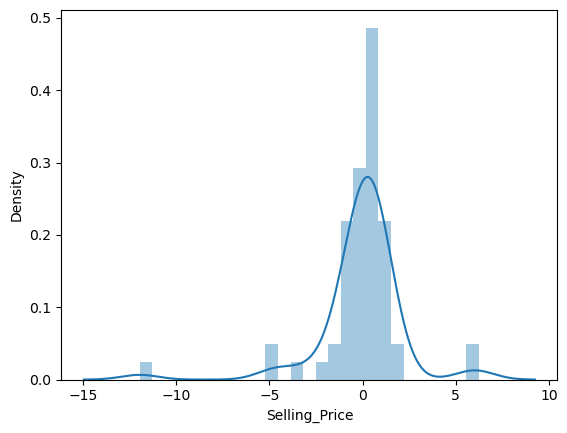

In [58]:
sns.distplot(prediction-y_test)

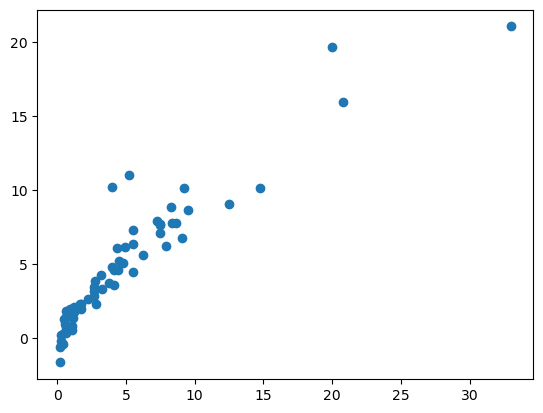

In [59]:
plt.scatter(y_test,prediction)

## * By the above diagram we can get to know that this Model is well designed because it's giving less error between actual and predicted as it's giving less error along with the best fit line.